Loading dataset, first look at the data and its structure, checking for missing values and appropriate data types

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

data = pd.read_csv('data.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

Relationship between the gender of the winners

sex
Male      905
Female     65
Name: count, dtype: int64


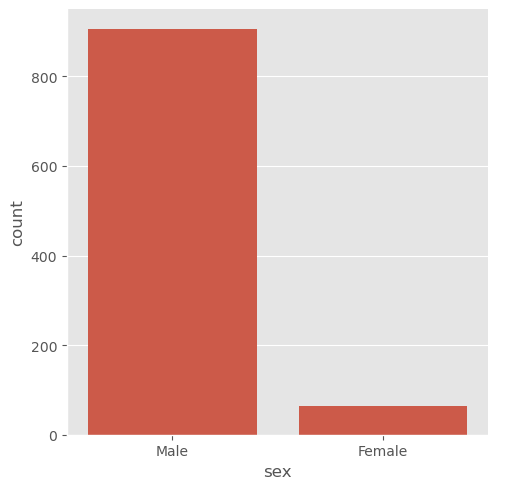

In [170]:
plt.style.use('ggplot') 

gender_award = data['sex'].value_counts() #number of awards by gender
print(gender_award)

sns.catplot(data = data, x = 'sex', kind = 'count') #creating plot
plt.show()

Examining the percentage of women among all winners across decades and categories

category  Chemistry  Economics  Literature  Medicine     Peace   Physics
decade                                                                  
1900       0.000000        NaN    0.100000  0.000000  0.071429  0.076923
1910       0.125000        NaN    0.000000  0.000000  0.000000  0.000000
1920       0.000000        NaN    0.200000  0.000000  0.000000  0.000000
1930       0.076923        NaN    0.111111  0.000000  0.111111  0.000000
1940       0.000000        NaN    0.166667  0.071429  0.142857  0.000000
1950       0.000000        NaN    0.000000  0.000000  0.000000  0.000000
1960       0.066667   0.000000    0.090909  0.000000  0.000000  0.058824
1970       0.000000   0.000000    0.000000  0.040000  0.230769  0.000000
1980       0.000000   0.000000    0.000000  0.130435  0.090909  0.000000
1990       0.000000   0.000000    0.300000  0.050000  0.176471  0.000000
2000       0.040000   0.050000    0.300000  0.153846  0.142857  0.000000
2010       0.037037   0.050000    0.300000  0.08333

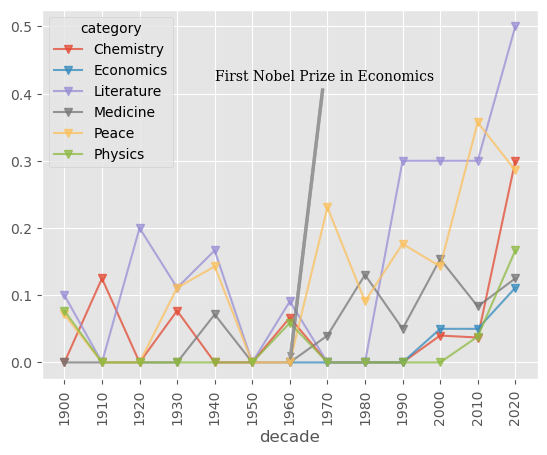

In [171]:
data['is_woman'] = data['sex'] == 'Female' #creating boolean column depending on gender
data['decade'] = data['year'] - data['year'] % 10 #creating decade column
women_ratio = pd.pivot_table(data, index = 'decade', values='is_woman', columns = 'category')
print(women_ratio)
#as we see the Nobel in economics was given for the first time in 1960s (NaN values before that), nevertheless we will visualise all decades for consistency
#visualising
women_ratio.plot(marker = 'v', alpha = 0.75)
plt.xticks(np.arange(1900, 2021, 10), rotation = 90)
plt.annotate('First Nobel Prize in Economics', xy=(1960, 0), xytext=(1940, 0.42), arrowprops={'arrowstyle':'simple', 'color':'grey', 'alpha':0.75}, fontsize='medium', fontfamily='serif')
plt.show()

Eximing birth country of winners and US-winners ratio across decades

birth_country
United States of America    291
United Kingdom               91
Germany                      67
France                       58
Sweden                       30
Japan                        28
Canada                       21
Netherlands                  19
Switzerland                  19
Italy                        18
Name: count, dtype: int64


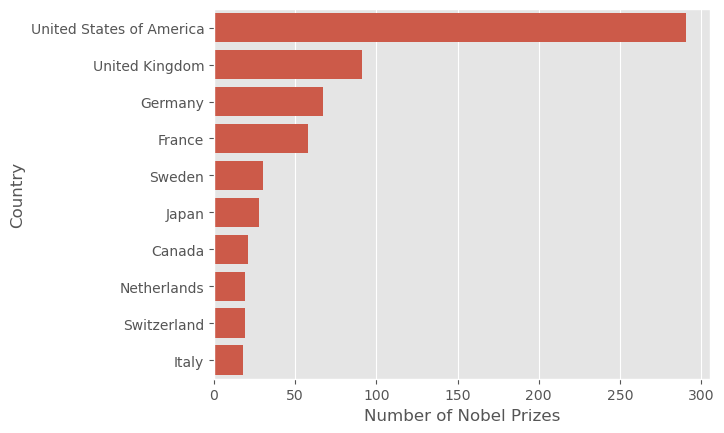

In [172]:
birthcountry = data['birth_country'].value_counts().head(10) #checking top 10 birth countries
print(birthcountry)
sns.barplot(x = birthcountry.values, y = birthcountry.index)
plt.xlabel('Number of Nobel Prizes')
plt.ylabel('Country')
plt.show()

decade
1900    0.017544
1910    0.075000
1920    0.074074
1930    0.250000
1940    0.302326
1950    0.291667
1960    0.265823
1970    0.317308
1980    0.319588
1990    0.403846
2000    0.422764
2010    0.314050
2020    0.360000
Name: is_usa, dtype: float64


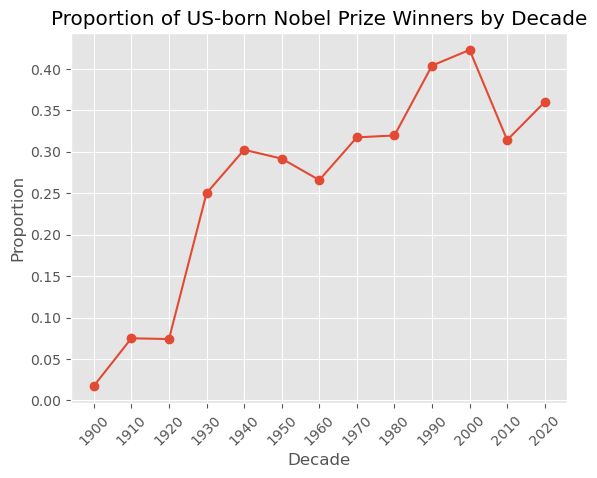

In [173]:
data['is_usa'] = data['birth_country'] == 'United States of America'
us_winners_ratio = data.groupby('decade')['is_usa'].mean()
print(us_winners_ratio)
us_winners_ratio.plot(marker = 'o')
plt.title('Proportion of US-born Nobel Prize Winners by Decade')
plt.xlabel('Decade')
plt.ylabel('Proportion')
plt.xticks(np.arange(1900, 2021, 10), rotation = 45)
plt.show()

Winners who have won more than once

full_name
Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Marie Curie, née Sklodowska                                                          2
Linus Carl Pauling                                                                   2
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
John Bardeen                                                                         2
Frederick Sanger                                                                     2
Name: count, dtype: int64


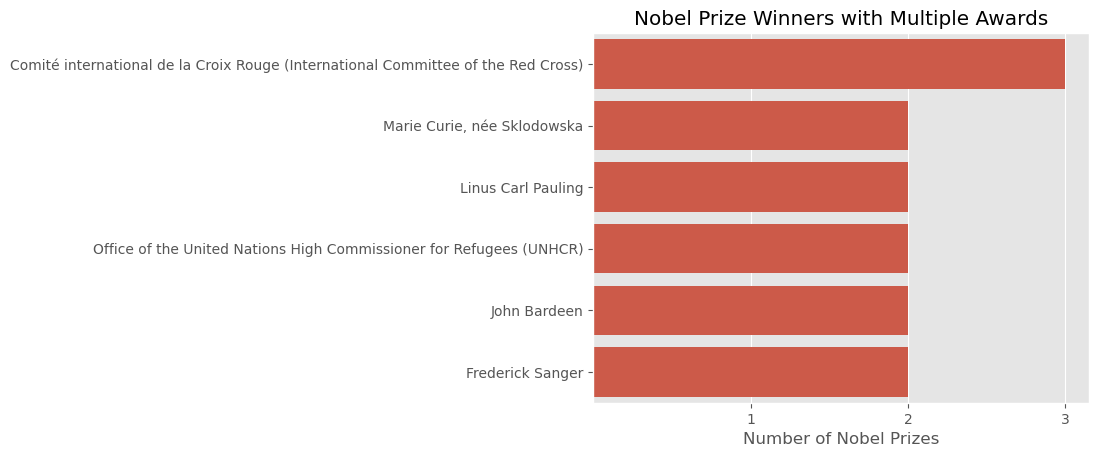

In [174]:
repeat = data.duplicated(subset = 'full_name', keep = False) #boolean column for duplicated names
duplicated_winners = data[repeat]['full_name'].value_counts()
print(duplicated_winners)

sns.barplot(x = duplicated_winners.values, y = duplicated_winners.index)
plt.xlabel('Number of Nobel Prizes')
plt.ylabel('')
plt.title('Nobel Prize Winners with Multiple Awards')
plt.xticks(range(1, duplicated_winners.max() + 1))
plt.show()

Exploring the age of the winners

In [175]:
data['birth_year'] = data['birth_date'].str[:4].astype('Int64') #exctracting birth year from birth date
print(data['birth_year'].isnull().mean()) #checking for null values
data['age'] = data['year'] - data['birth_year'] #calculating age at the time of award
print(data['age'].describe())

avg_age = data.groupby('year')['age'].mean() #creating series with average age per year

0.032
count        968.0
mean     60.268595
std      12.645274
min           17.0
25%           51.0
50%           61.0
75%           69.0
max           97.0
Name: age, dtype: Float64


In [ ]:
#estimating linear regression model for avg age across years
import statsmodels.api as sm

Y = avg_age.to_numpy()
X = sm.add_constant(avg_age.index.to_numpy())

model = sm.OLS(Y, X)
res = model.fit()

#structural parameters
eq_params = f'y={res.params[0]:.2f} + {res.params[1]:.2f}t'

#siginificance test of structural parameters
pvalues = {
    'const':res.pvalues[0],
    't':res.pvalues[1]
}
t_test = pd.DataFrame.from_dict(pvalues, orient = 'index', columns = ['pvalue'])

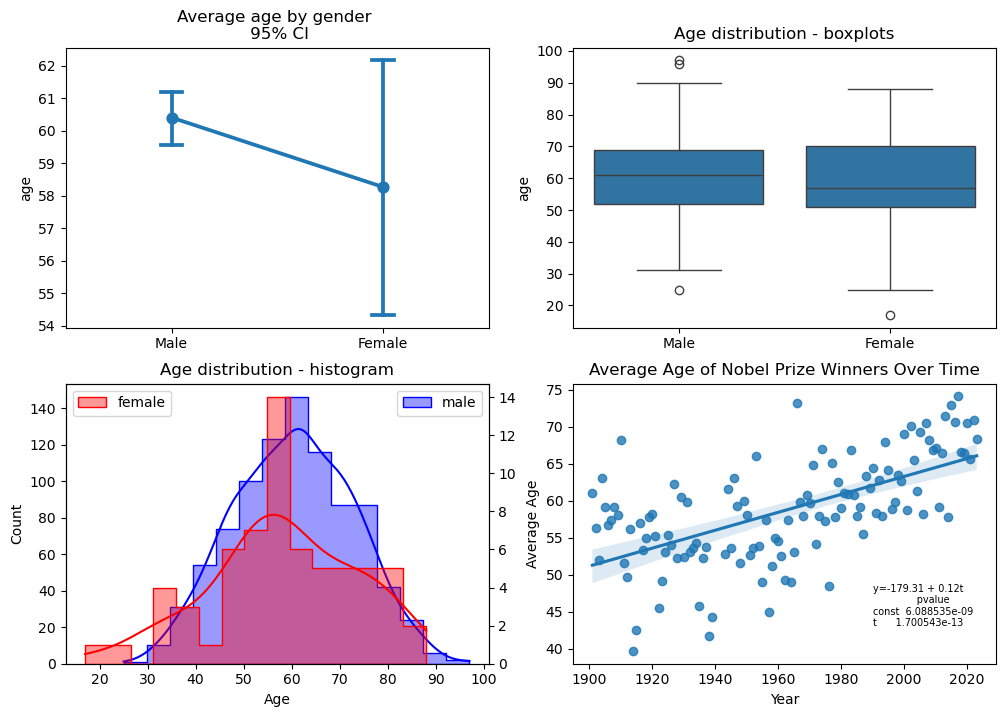

In [177]:
plt.style.use('default')
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

#plotting average age by gender with 95% CI
sns.pointplot(data = data, x = 'sex', y = 'age', ax = ax[0,0], capsize = 0.1)
ax[0,0].set_title('Average age by gender \n 95% CI')
ax[0,0].set_xlabel('')


#plotting distribution using boxplots
sns.boxplot(data=data, x = 'sex', y = 'age', ax = ax[0,1])
ax[0,1].set_title('Age distribution - boxplots')
ax[0,1].set_xlabel('')


#plotting distrubution by histograms
men = data[data['sex'] == 'Male']['age']
women = data[data['sex'] == 'Female']['age']
ax[1,0].set_title('Age distribution - histogram')


ax2 = ax[1,0].twinx()
sns.histplot(ax = ax[1,0], x = men, alpha = 0.4, color = 'blue', label = 'male', kde = True, bins = 15, element = 'step')
sns.histplot(ax = ax2, x=women, color='r', alpha = 0.4, label = "female", kde = True, bins = 15, element = 'step')
ax[1,0].legend()
ax2.legend(loc = 'upper left')
ax2.set_ylabel('')
ax[1,0].set_xlabel('Age')
#plotting trend

sns.regplot(x = avg_age.index, y = avg_age.values, ax = ax[1,1])
ax[1,1].set_title('Average Age of Nobel Prize Winners Over Time')
ax[1,1].set_xlabel('Year')
ax[1,1].set_ylabel('Average Age')
ax[1,1].annotate(f'{eq_params} \n {t_test}', xy = (1990, 43), fontsize = 7);